In [85]:
import datetime
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

%matplotlib inline

In [48]:
data = pd.read_csv("apply_rate.csv")

In [49]:
data["title_proximity_tfidf"] =  data["title_proximity_tfidf"].fillna(data["title_proximity_tfidf"].mode()[0])
data["description_proximity_tfidf"] =  data["description_proximity_tfidf"].fillna(data["description_proximity_tfidf"].mode()[0])
data["city_match"] = data["city_match"].fillna(data["city_match"].mode()[0])
data["search_date_pacific"] = ((pd.to_datetime(data.search_date_pacific) - datetime.datetime(1970,1,1)).dt.days).astype(int)

data.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5.0,0,17552,-7613806991329176388
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,0,17552,-1361819269400927213
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,1,17552,-1361819269400927213
3,0.000000,0.000000,3.695809,0.013046,0.033340,0.0,5.0,0,17554,-3623880078591607667
4,0.000000,0.000000,7.868900,0.008065,0.008772,0.0,7.0,0,17555,-7054510112423797411


# Random Forest Classifer (90.8% accuracy) | Dummy (82.9% accuracy)

In [50]:
scaler = MinMaxScaler()

data = pd.DataFrame(data = scaler.fit_transform(data), columns = data.columns)

In [52]:
X = data.iloc[:, :-3]
y = data.iloc[:, -3]

In [56]:
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [73]:
rand_clf = RandomForestClassifier(n_estimators = 100, max_depth = 7,
                                  random_state = 42, n_jobs = -1)
rand_clf.fit(X_train, y_train)
accuracy_score(y_test, rand_clf.predict(X_test))

0.9078841512469831

In [63]:
# dummy classifer
dumb = DummyClassifier()
dumb.fit(X_train, y_train)
pred = dumb.predict(X_test)
acc = accuracy_score(y_test, pred)
print(acc)

0.8295789755966747


# Clustering

In [80]:
sil_score = []
for i in tqdm(range(2,15)):
    kmean = KMeans(n_clusters=i)
    pred = kmean.fit_predict(X)
    sil_score.append([i, silhouette_score(X, pred)])


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [02:10<00:00, 10.03s/it]


Text(0.5, 1.0, 'Silhoette Score')

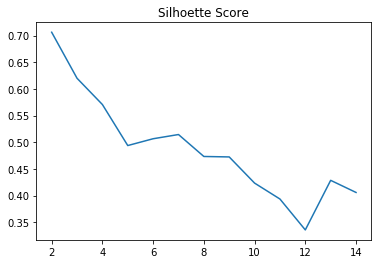

In [82]:
sil_score = np.array(sil_score)
plt.plot(sil_score[:, 0], sil_score[:, 1])
plt.title("Silhoette Score")

In [83]:
# this is very good. The highest clustering is a cluster of 2. This means that the data can indeed be classified as 
#   a binary value. 

# the next step is to use dim reduction to try and graph the points

In [86]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X)

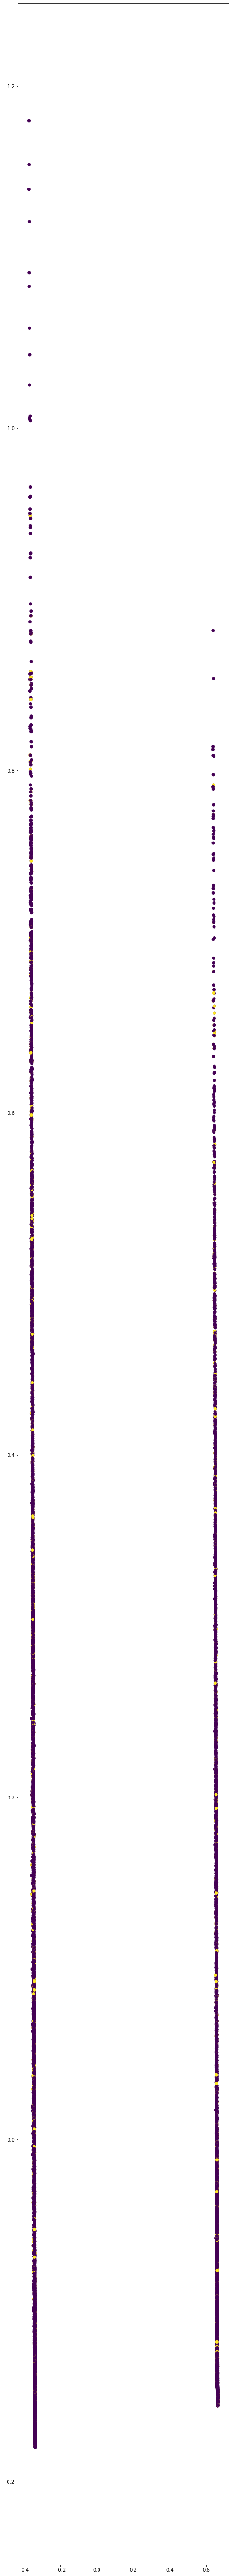

In [99]:
fig = plt.figure(figsize = (8,100))
plt.scatter(pca_data[:,0], pca_data[:,1], c = y)


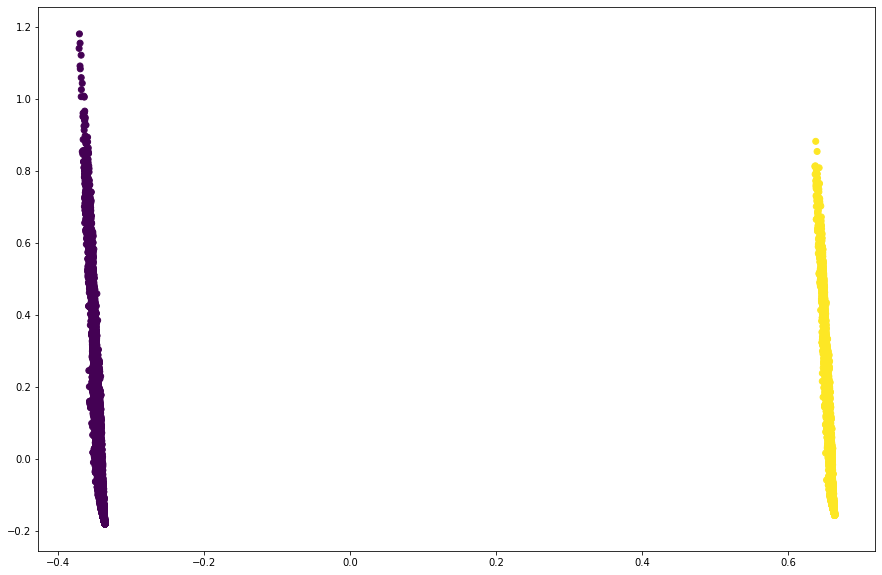

In [96]:
kmean = KMeans(n_clusters=2)
pred = kmean.fit_predict(X)
fig = plt.figure(figsize = (15,10))
plt.scatter(pca_data[:,0], pca_data[:,1], c = pred)


# 1) test different decomposition/dim reduction algorithms
# 2) look at different clustering
# 3) try to get >96% for classification